In [1]:
from utils.results import *

In [2]:
# settings for the plots,
dataset= 'mvtec'
run= "contamination_0"  
experiment=  "Exp_11_02_24-"#,"Exp0-r18",
category= "bottle"


RESPATH="results"
DATASET=os.path.join(RESPATH, dataset)  

## Multiple runs

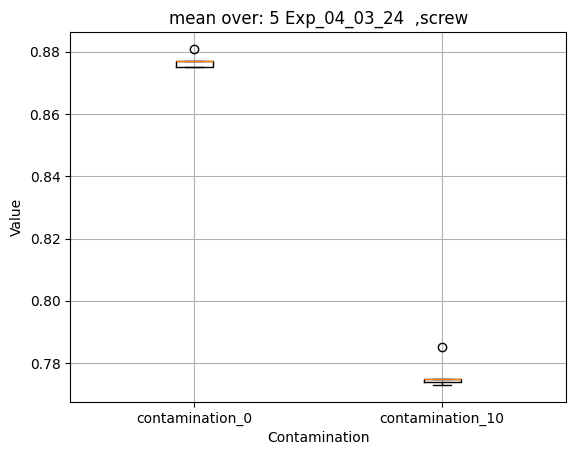

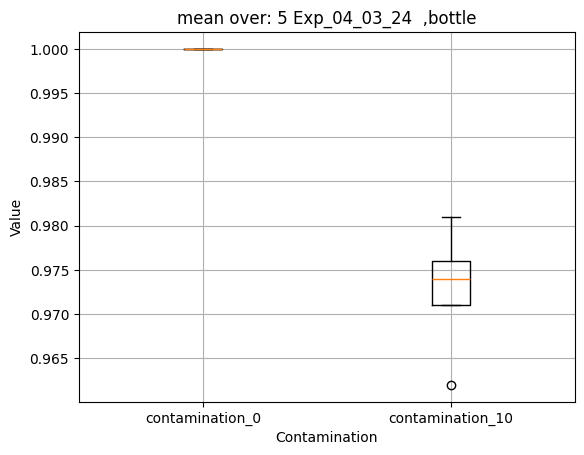

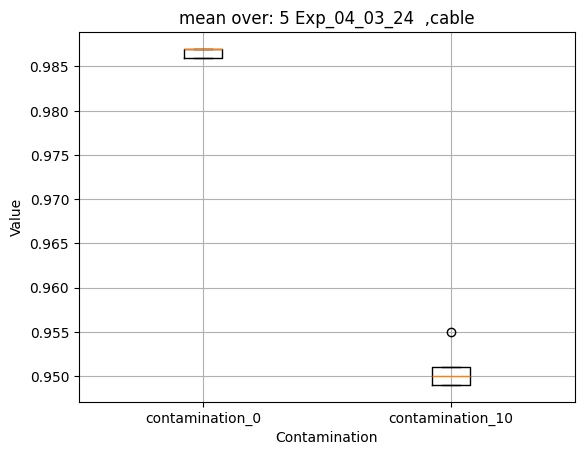

In [3]:
plot_vals_per_category_and_contamination_multirun(RESPATH,dataset,experiment="Exp_04_03_24",category="screw" ,reps=["_run_1","_run_2","_run_3","_run_4","_run_5"],contam_dir_list=["contamination_0","contamination_10"])
plot_vals_per_category_and_contamination_multirun(RESPATH,dataset,experiment="Exp_04_03_24",category="bottle",reps=["_run_1","_run_2","_run_3","_run_4","_run_5"],contam_dir_list=["contamination_0","contamination_10"])
plot_vals_per_category_and_contamination_multirun(RESPATH,dataset,experiment="Exp_04_03_24",category="cable" ,reps=["_run_1","_run_2","_run_3","_run_4","_run_5"],contam_dir_list=["contamination_0","contamination_10"])

## single runs 

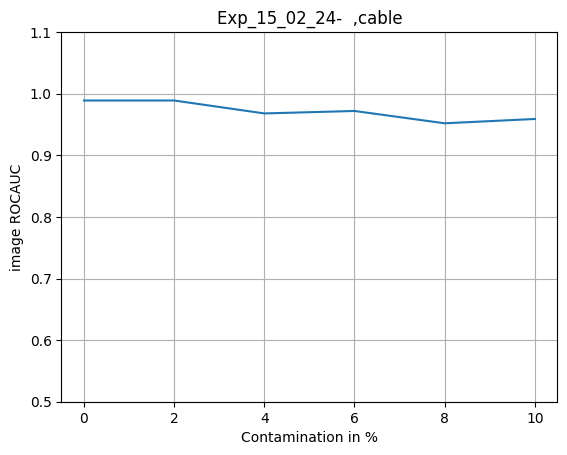

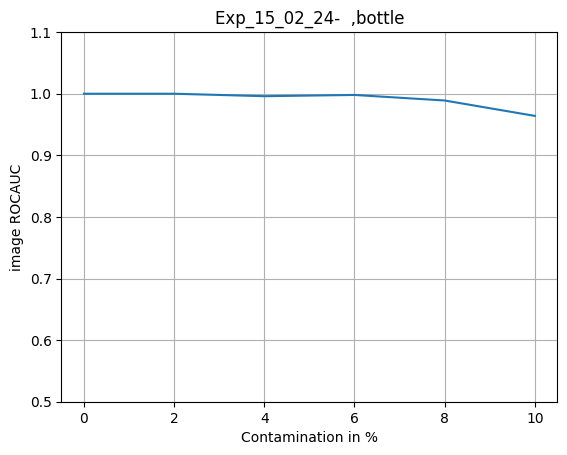

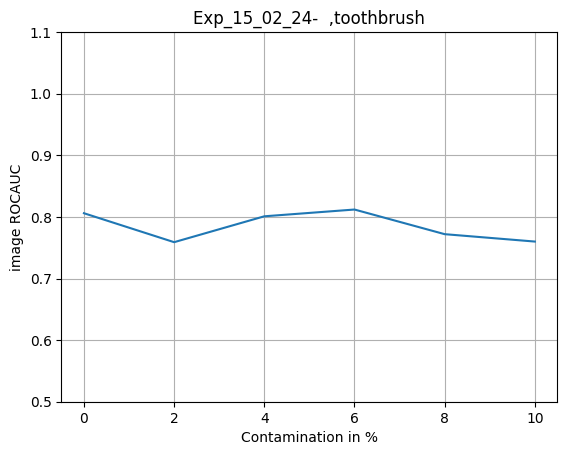

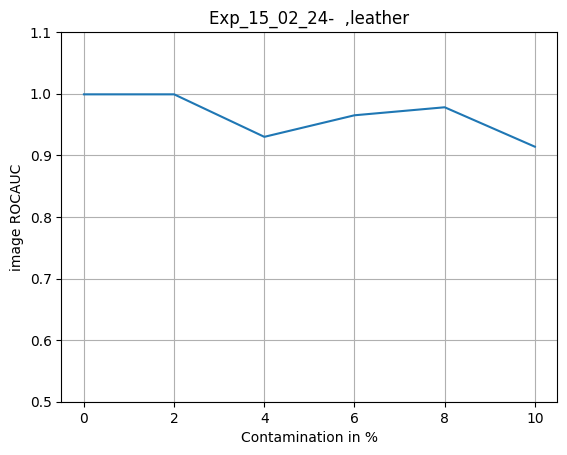

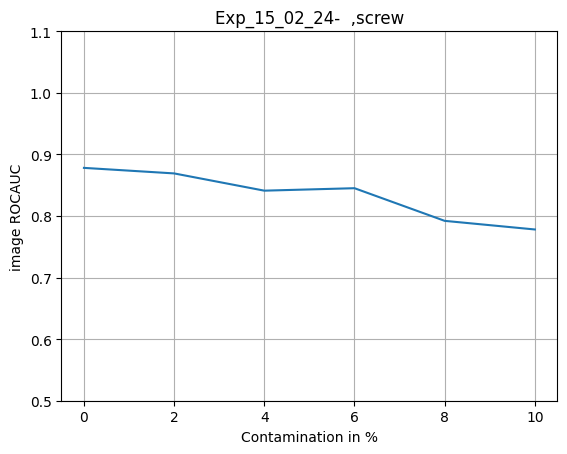

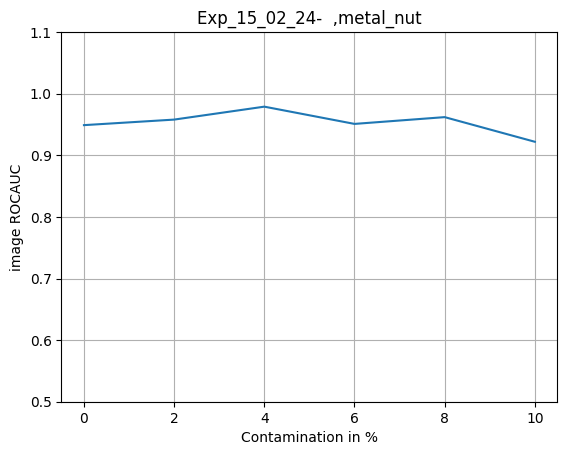

In [3]:
#contam_dir_list=["contamination_0","contamination_2","contamination_4","contamination_6","contamination_8","contamination_10"]
plot_vals_per_category_and_contamination(RESPATH,dataset,experiment="Exp_15_02_24-",category="cable")
plot_vals_per_category_and_contamination(RESPATH,dataset,experiment="Exp_15_02_24-",category="bottle")
plot_vals_per_category_and_contamination(RESPATH,dataset,experiment="Exp_15_02_24-",category="toothbrush")
plot_vals_per_category_and_contamination(RESPATH,dataset,experiment="Exp_15_02_24-",category="leather")
plot_vals_per_category_and_contamination(RESPATH,dataset,experiment="Exp_15_02_24-",category="screw")
plot_vals_per_category_and_contamination(RESPATH,dataset,experiment="Exp_15_02_24-",category="metal_nut")

['leather', 'toothbrush', 'bottle', 'metal_nut', 'screw', 'cable']


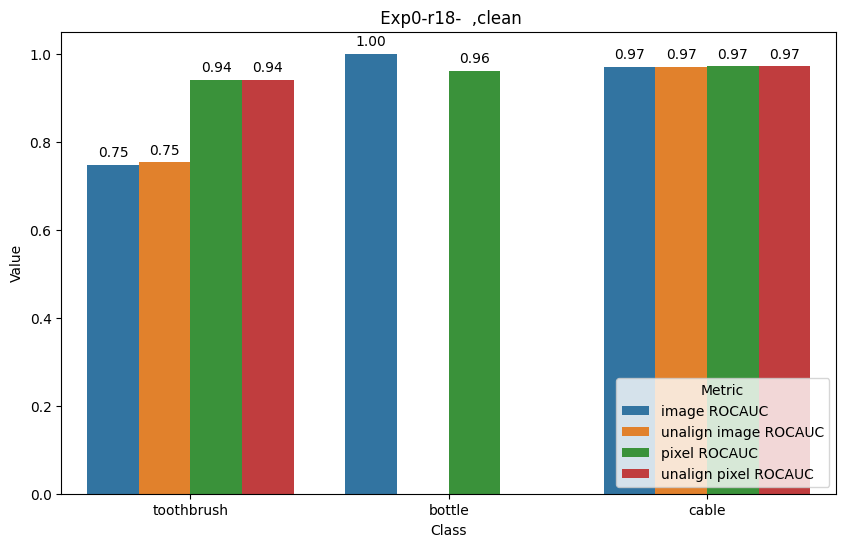

['leather', 'toothbrush', 'bottle', 'metal_nut', 'screw', 'cable']


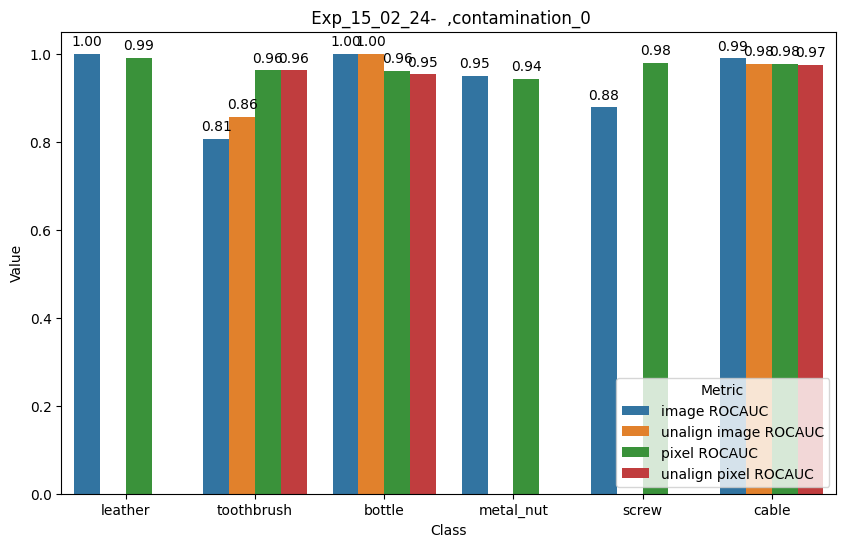

['leather', 'toothbrush', 'bottle', 'metal_nut', 'screw', 'cable']


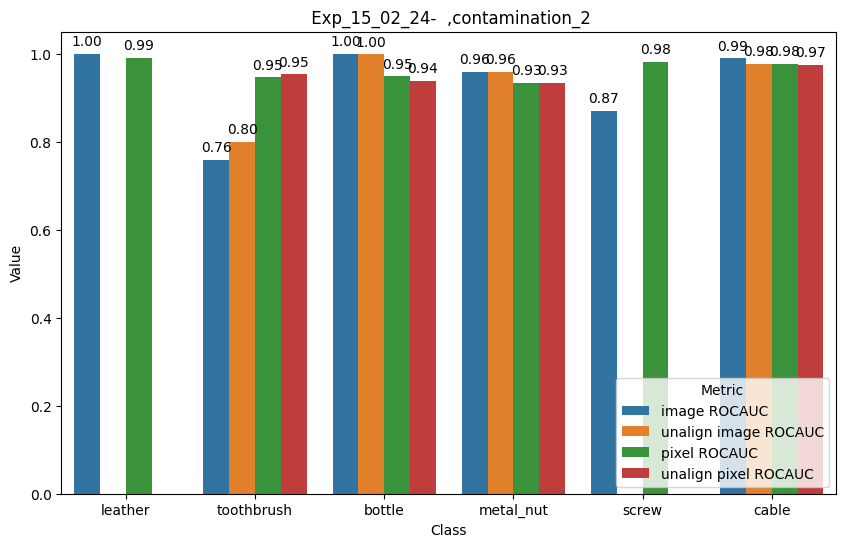

['leather', 'toothbrush', 'bottle', 'metal_nut', 'screw', 'cable']


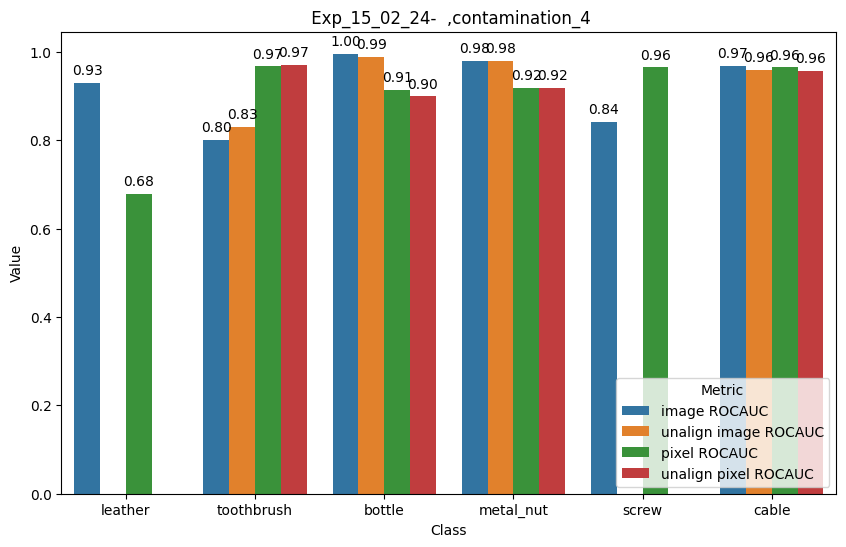

['leather', 'toothbrush', 'bottle', 'metal_nut', 'screw', 'cable']


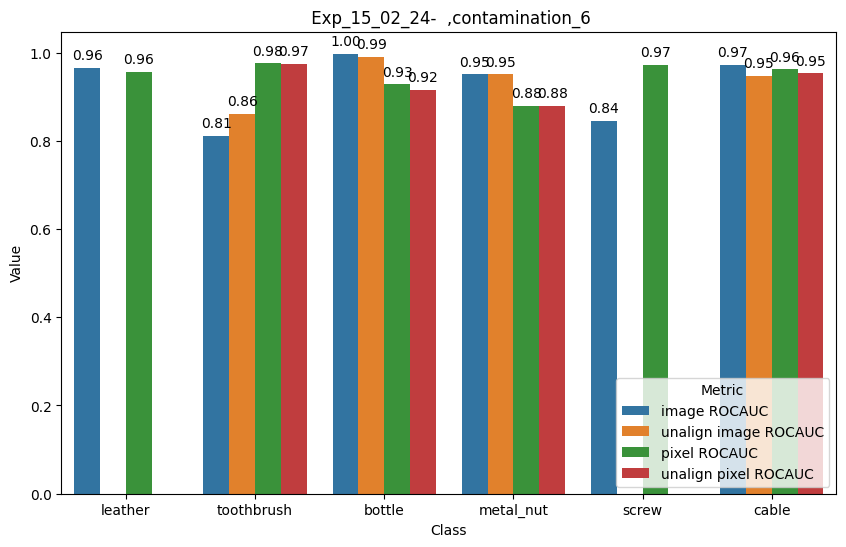

['leather', 'toothbrush', 'bottle', 'metal_nut', 'screw', 'cable']


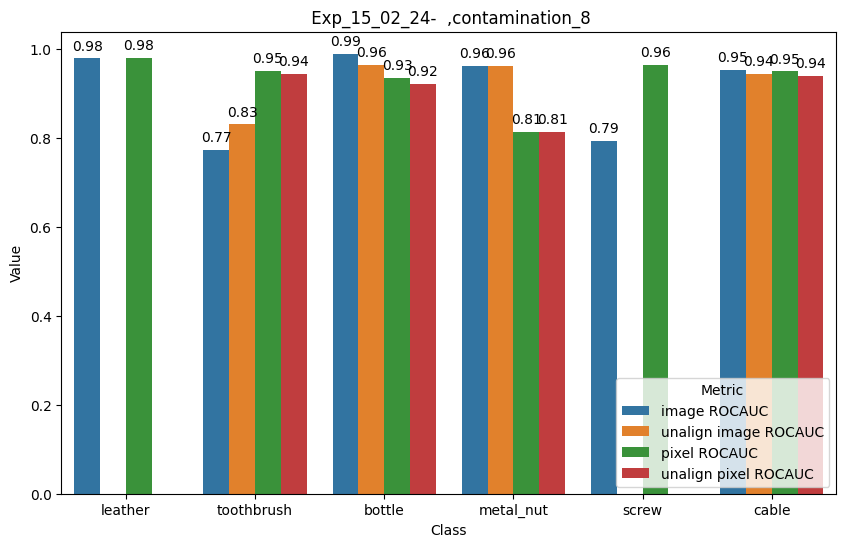

['leather', 'toothbrush', 'bottle', 'metal_nut', 'screw', 'cable']


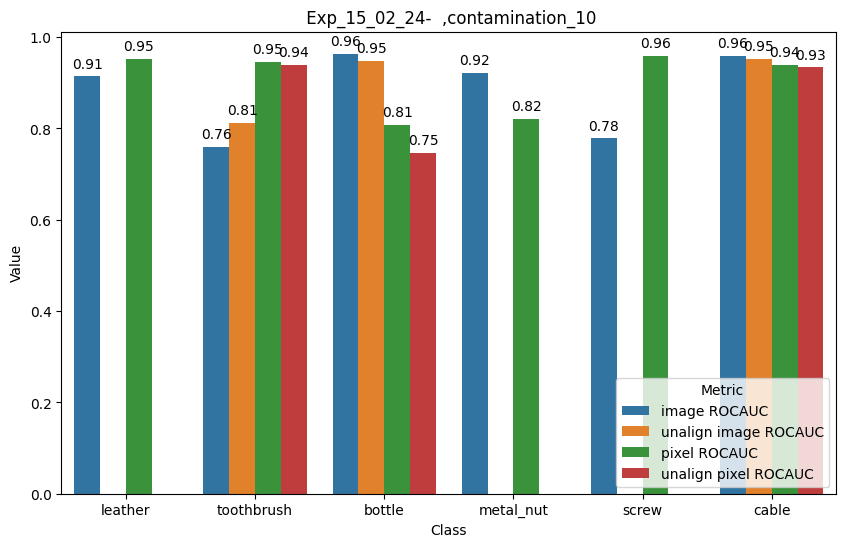

In [4]:
plot_vals_per_category(RESPATH,dataset,run="clean",experiment="Exp0-r18-")
plot_vals_per_category(RESPATH,dataset,run="contamination_0",experiment="Exp_15_02_24-")
plot_vals_per_category(RESPATH,dataset,run="contamination_2",experiment="Exp_15_02_24-")
plot_vals_per_category(RESPATH,dataset,run="contamination_4",experiment="Exp_15_02_24-")
plot_vals_per_category(RESPATH,dataset,run="contamination_6",experiment="Exp_15_02_24-")
plot_vals_per_category(RESPATH,dataset,run="contamination_8",experiment="Exp_15_02_24-")
plot_vals_per_category(RESPATH,dataset,run="contamination_10",experiment="Exp_15_02_24-")

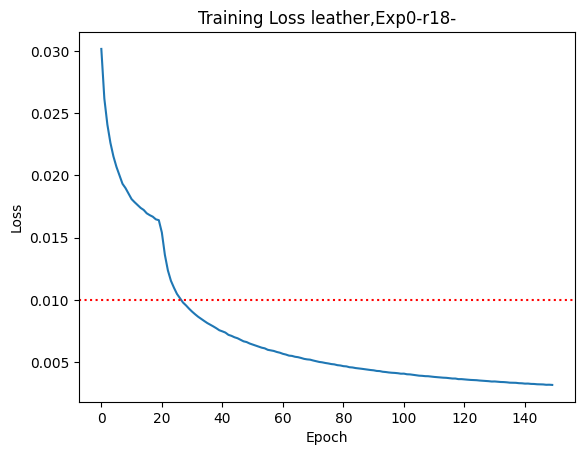

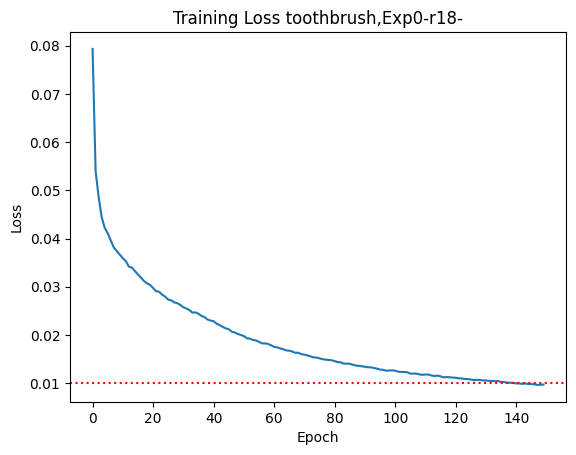

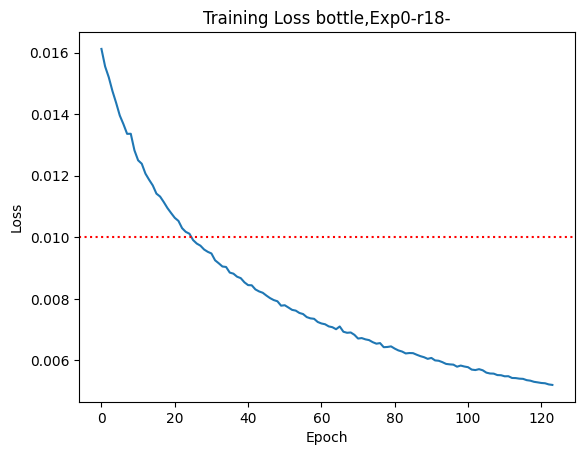

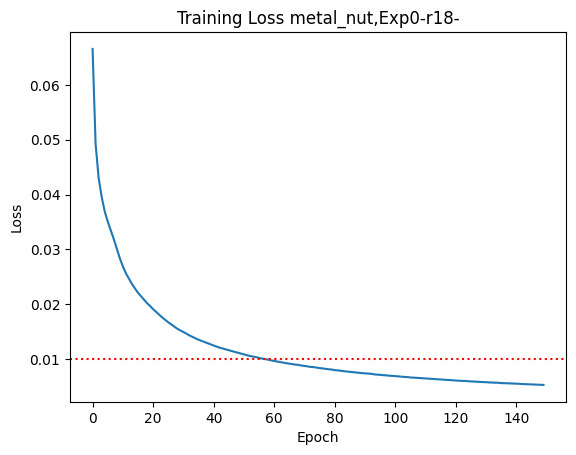

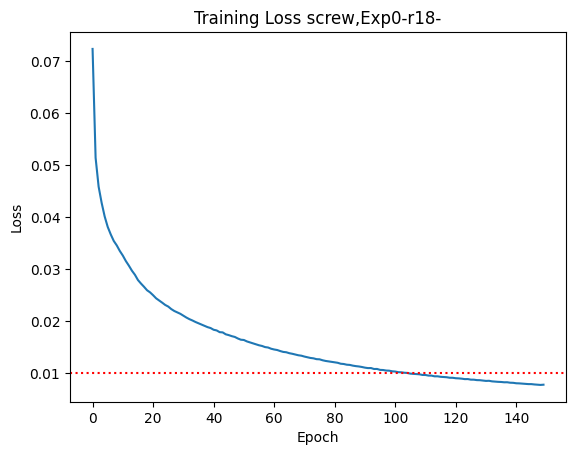

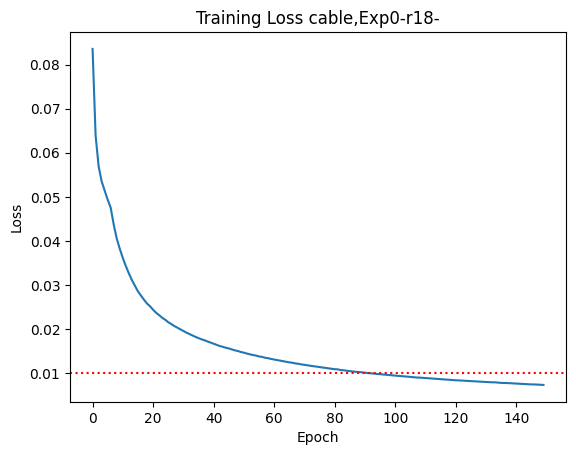

In [5]:
plot_losses(RESPATH,dataset='mvtec',run="clean",experiment="Exp0-r18-")

In [6]:
plot_losses(RESPATH,dataset='mvtec',run="contamination_0",experiment="Exp_11_02_24-")

FileNotFoundError: [Errno 2] No such file or directory: 'results/mvtec/contamination_0/Exp_11_02_24-leather/args.log'

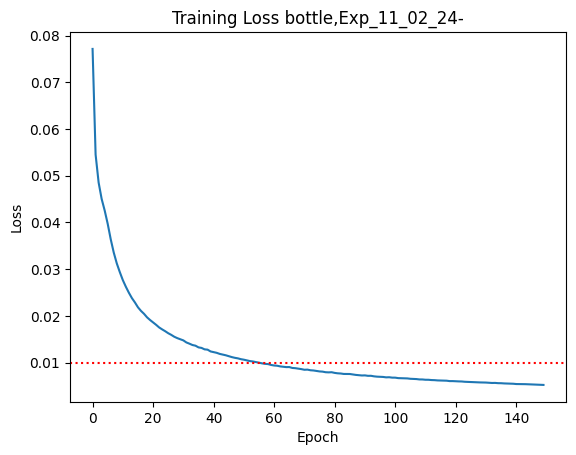

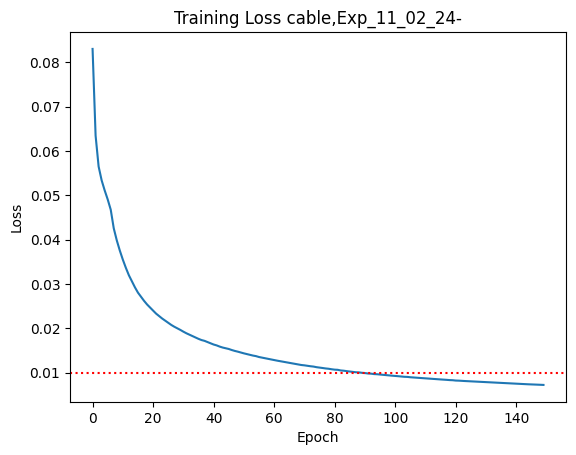

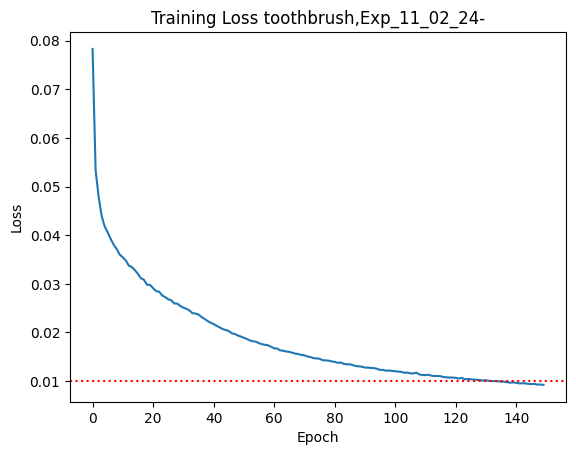

In [ ]:
plot_losses(RESPATH,dataset='mvtec',run="contamination_6",experiment="Exp_11_02_24-")